# Plotting Stress-strain curves in reproducible way
This tutorial will show how to plot 'publication' quality stress strain curves using python. 
The datasets are in form of excel files, which we assume to be the standard way in which the stress strain curve data is stored. 
The tutorial will cover basics of python programming language.
Moreover, this notebook can be modified to handle large amounts of datafiles of similar format to plot multiple curves at once and be have a reproducible plotting style

# Why use python for plotting?

- Flexible, any special plot feature can be created
- Free and open source
- calculations are faster and other options for data analysis
- reproducibility
- Automate repetitive steps


*with **jupterhub server** python is easier to use than ever*

## Modules in python
Python has a huge library of codes. 
These different types of codes can be bound together into modules.
When we want to use these set of codes for certain purpose, we **import** them.
Once you import some module, you can use the functions/classes etc present in it.

To enable use of access, we also rename the modules to the names we want. 
Following modules are used in this notebook:
1. [pandas](https://pandas.pydata.org/)            - For Data analysis and manipulation 
2. [numpy](https://numpy.org/)                     - Package for numerical/scientific computing with lots of array based calculations 
3. [math](https://docs.python.org/3/library/math.html) - Module for mathematical functions
3. [matplotlib](https://matplotlib.org/)           - The most widely used plotting library based on python 
4. [os](https://docs.python.org/3/library/os.html) - Library for Operating system related functionality

In [1]:
import pandas as pd
import numpy as np
import math
import os
import matplotlib as mpl
import matplotlib.pyplot as PyPlot
%matplotlib inline

There were some changes to pandas which requires some extra things to read the xlsx files. 
These will already be installed on the jupyterhub server and therefore nothing to be concerned about

In [2]:
!pip3 install xlrd

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [3]:
!pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


### Reading in excel file
We use the function **read_excel** inside of pandas to read the excel files we have.

Based on my excel file, I know that the relevant data is from row 5 (in python it is row 4 as counting starts from 0).

And I use only columns A to L.

In the function below, we first give the name of the excel file.

Then we specify, from which row in the excel file is used to label our data. 

As row 4 (start counting at 0!!) has the column names, we say header is 4.


In [4]:
df = pd.read_excel('sample_data/Data_1.xlsx',header=4,usecols='A:L',engine='openpyxl')

This is how the file looks here now in form of a **DataFrame**

In [5]:
df

,Unnamed: 0,Time (s),Temperature (°C),Change in Length (µm),Force (N),Change in length (µm),Abs. Change in length (µm),Eng. Strain,Eng. Stress (MPa),Length (µm),True Strain,True Stress
0,4,0.000958,999.203430,80.129005,10.600432,0.000000,0.000000,0.000000,0.539876,10.000000,0.000000,0.539876
1,5,0.001274,999.178467,79.966232,10.680738,-0.162773,0.162773,-0.000016,0.543966,9.999837,0.000016,0.543957
2,6,0.001600,999.369263,80.590210,12.420709,0.461205,-0.461205,0.000046,0.632581,10.000461,-0.000046,0.632611
3,7,0.001916,999.375610,80.548386,12.376094,0.419380,-0.419380,0.000042,0.630309,10.000419,-0.000042,0.630336
4,8,0.002231,999.448853,81.161438,13.069108,1.032433,-1.032433,0.000103,0.665604,10.001032,-0.000103,0.665673
...,...,...,...,...,...,...,...,...,...,...,...,...
3390,3394,1.085596,1003.625183,-5808.419434,13.129526,-5888.548439,5888.548439,-0.588855,0.668681,4.111452,0.888809,0.274925
3391,3395,1.085926,1003.529785,-5808.728516,12.607720,-5888.857521,5888.857521,-0.588886,0.642106,4.111142,0.888884,0.263979
3392,3396,1.086243,1003.397522,-5808.293457,13.705363,-5888.422462,5888.422462,-0.588842,0.698008,4.111578,0.888778,0.286992
3393,3397,1.086557,1003.240112,-5808.186523,13.714368,-5888.315529,5888.315529,-0.588832,0.698467,4.111684,0.888752,0.287188


### Accessing data within a dataframe
The data in the columns of a dataframe can be accessed by calling out the name of the column as shown below

In [6]:
df['True Strain']

0       0.000000
1       0.000016
2      -0.000046
3      -0.000042
4      -0.000103
          ...   
3390    0.888809
3391    0.888884
3392    0.888778
3393    0.888752
3394    0.888735
Name: True Strain, Length: 3395, dtype: float64

### Plotting

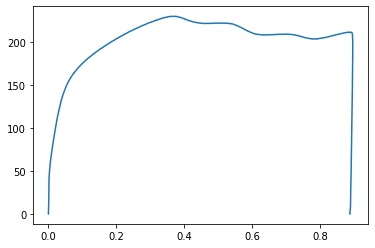

In [7]:
PyPlot.plot(df['True Strain'],df['True Stress'])

## Looping over files
But as we want to use the power that python provides, we would like to do everything at once. 
***Loop*** give us this power - Looping is basically repeating a set of commands number of times

Also we need to know something about the datatypes in python: 
**Lists** and **Dictionaries**


### List example
This is an example of list. It is denoted by square brackets **[ ]**

It is used to store iterable (looping possibilities) items to be called by a single variable.

In [8]:
# empty list
example_list = []

# list of integers
example_list = [1, 2, 3]

In [9]:
# Call list items
example_list[0]

1

In [10]:
# meaning of iterable - can be looped over
for i in example_list:
    print(i)

1
2
3


### Dictionary example
Dictionary is similar to our 'normal' dictionaries. They are denoted by curly brackets **{ }**. 

Dictionaries can store any kind of data/data structure as values.

We have key and value pairs.

In [11]:
example_dict = {'a':1, 'b': 2}
example_dict = {'a':'Apple', 'b': 'Banana'}
example_dict = {'a':[1,2,3], 'b': [4,5,6]}

In [12]:
# to view the keys in the dictionaries
example_dict.keys()

dict_keys(['a', 'b'])

In [13]:
# to view the values in the dictionaries
example_dict.values()

dict_values([[1, 2, 3], [4, 5, 6]])

In [14]:
example_dict.items()

dict_items([('a', [1, 2, 3]), ('b', [4, 5, 6])])

In [15]:
# what does one specific key correspond to?
example_dict['a']

[1, 2, 3]

In [16]:
# loop over keys
for i in example_dict.keys():
    print(i)

a
b


In [17]:
# loop over values directly
for i in example_dict.values():
    print(i)

[1, 2, 3]
[4, 5, 6]


In [18]:
# loop over items
for i in example_dict.items():
    print(i)

('a', [1, 2, 3])
('b', [4, 5, 6])


In the example below, the list has multiple file names which we can loop over (iterable).

In [19]:
os.listdir('sample_data/')

['Data_1.xlsx', 'Data_2.xlsx', 'Data_3.xlsx', 'Data_4.xlsx']

In [20]:
data_dict = {}
for i in os.listdir('sample_data/'):
    data_dict[i] = pd.read_excel('sample_data/'+i,header=4,usecols='A:L',engine='openpyxl')

In [21]:
data_dict.keys()

dict_keys(['Data_1.xlsx', 'Data_2.xlsx', 'Data_3.xlsx', 'Data_4.xlsx'])

In [22]:
data_dict['Data_1.xlsx']

,Unnamed: 0,Time (s),Temperature (°C),Change in Length (µm),Force (N),Change in length (µm),Abs. Change in length (µm),Eng. Strain,Eng. Stress (MPa),Length (µm),True Strain,True Stress
0,4,0.000958,999.203430,80.129005,10.600432,0.000000,0.000000,0.000000,0.539876,10.000000,0.000000,0.539876
1,5,0.001274,999.178467,79.966232,10.680738,-0.162773,0.162773,-0.000016,0.543966,9.999837,0.000016,0.543957
2,6,0.001600,999.369263,80.590210,12.420709,0.461205,-0.461205,0.000046,0.632581,10.000461,-0.000046,0.632611
3,7,0.001916,999.375610,80.548386,12.376094,0.419380,-0.419380,0.000042,0.630309,10.000419,-0.000042,0.630336
4,8,0.002231,999.448853,81.161438,13.069108,1.032433,-1.032433,0.000103,0.665604,10.001032,-0.000103,0.665673
...,...,...,...,...,...,...,...,...,...,...,...,...
3390,3394,1.085596,1003.625183,-5808.419434,13.129526,-5888.548439,5888.548439,-0.588855,0.668681,4.111452,0.888809,0.274925
3391,3395,1.085926,1003.529785,-5808.728516,12.607720,-5888.857521,5888.857521,-0.588886,0.642106,4.111142,0.888884,0.263979
3392,3396,1.086243,1003.397522,-5808.293457,13.705363,-5888.422462,5888.422462,-0.588842,0.698008,4.111578,0.888778,0.286992
3393,3397,1.086557,1003.240112,-5808.186523,13.714368,-5888.315529,5888.315529,-0.588832,0.698467,4.111684,0.888752,0.287188


#### Finding stress and strain limits in the whole dataset

In [23]:
for i in data_dict.values():
    print(i)

      Unnamed: 0  Time (s)  Temperature (°C)  Change in Length (µm)  \
0              4  0.000958        999.203430              80.129005   
1              5  0.001274        999.178467              79.966232   
2              6  0.001600        999.369263              80.590210   
3              7  0.001916        999.375610              80.548386   
4              8  0.002231        999.448853              81.161438   
...          ...       ...               ...                    ...   
3390        3394  1.085596       1003.625183           -5808.419434   
3391        3395  1.085926       1003.529785           -5808.728516   
3392        3396  1.086243       1003.397522           -5808.293457   
3393        3397  1.086557       1003.240112           -5808.186523   
3394        3398  1.086874       1003.100525           -5808.115234   

      Force (N)  Change in length (µm)  Abs. Change in length (µm)  \
0     10.600432               0.000000                    0.000000   
1     1

In [24]:
max_stress_lim = 0.0
max_strain_lim = 0.0
for expt_data in data_dict.values():
    max_y_lim = np.max(expt_data['True Stress'])   #finding maximum stress for a given file
    max_x_lim = np.max(expt_data['True Strain'])   #finding maximum strain for a given file
    if max_y_lim > max_stress_lim:
        max_stress_lim = max_y_lim
    if max_x_lim > max_strain_lim:
        max_strain_lim = max_x_lim

In [25]:
max_strain_lim

0.8982107658233847

In [26]:
max_stress_lim

253.67019269840904

Rounding off values

In [27]:
max_strain_lim = round(max_strain_lim * 2.0) / 2.0
max_stress_lim = (round(max_stress_lim/50.0)+2.0)*50.0

In [28]:
max_stress_lim,max_strain_lim

(350.0, 1.0)

## Plot settings

In [29]:
set_colors = ['black','red','teal','fuchsia','blue'] # https://matplotlib.org/gallery/color/named_colors.html

In [30]:
# might remove it if it is too much
PyPlot.rcParams["text.usetex"] =True  
#using latex rendering https://stackoverflow.com/questions/43741928/matplotlib-raw-latex-epsilon-only-yields-varepsilon

In [31]:
linestyle_list = ['solid', 'dashed', 'dashdot', 'dotted']
label_list = [1073,1173,1273,1373]

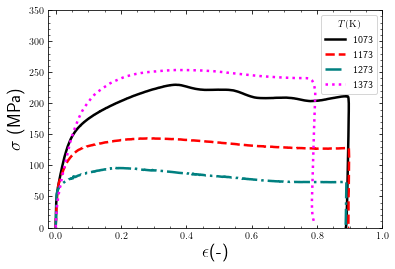

In [32]:
fig, ax = PyPlot.subplots()
ax.tick_params(which='both',direction="in",top=True,right=True)
ax.minorticks_on()

#for count,i in enumerate(data_dict.keys()):
for datas,line,colors,labels in zip(data_dict.values(),linestyle_list,set_colors,label_list):
    PyPlot.plot(datas['True Strain'],
                datas['True Stress'],
                color=colors,
                linewidth = 2.5,
                linestyle = line,
                label = labels
                )
    PyPlot.xlim(-0.025,max_strain_lim)
    PyPlot.ylim(0.0,max_stress_lim)
    PyPlot.xlabel('$\epsilon$(-)',fontsize=18)   # latex based symbols
    PyPlot.ylabel('$\sigma$ (MPa)',fontsize=18)
    PyPlot.legend(title='$ T (\mathrm{K})$')#,title_fontsize ='large')
        
fig.savefig('multi_stress_strain.png',dpi=600)

### Cutting off data

Can be done automatically but I guess it might be quite difficult for starters as it involves smoothing and fitting and so on

In [33]:
cut_off_strains = []
data_dict_2 = {}
data_dict_2['Data_1.xlsx'] = data_dict['Data_1.xlsx'].loc[data_dict['Data_1.xlsx']['True Strain'] < 0.88]


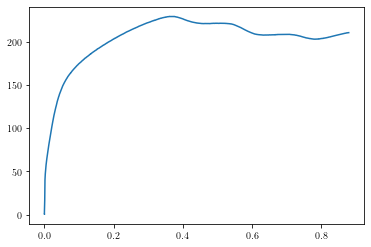

In [34]:
PyPlot.plot(data_dict_2['Data_1.xlsx']['True Strain'],data_dict_2['Data_1.xlsx']['True Stress'])

## Automating cut off

Idea: See where the derivative drops significantly

For automation might need smooth data

Need simpler ideas for python newbies. I dont want to make a complicated code. 

In [35]:
from scipy.signal import savgol_filter

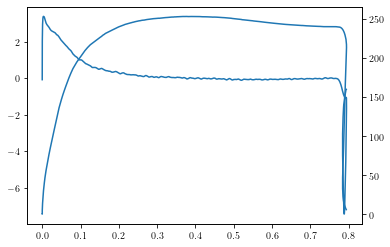

In [36]:
fig,ax1 = PyPlot.subplots()
ax1.plot(data_dict['Data_4.xlsx']['True Strain'],savgol_filter(data_dict['Data_4.xlsx']['True Stress'],31,9,deriv=1))
ax2 = ax1.twinx()
ax2.plot(data_dict['Data_4.xlsx']['True Strain'],data_dict['Data_4.xlsx']['True Stress'])

In [48]:
index_min = np.argmin(savgol_filter(data_dict['Data_1.xlsx']['True Stress'],71,9,deriv=1))
data_dict['Data_1.xlsx']['True Strain'][index_min]

0.8953057035808059

In [50]:
math.floor(0.8953057035808059*50.0)/50.0

0.88

In [44]:
data_dict['Data_4.xlsx'].loc[data_dict['Data_4.xlsx']['True Strain'] < 0.88]

,Unnamed: 0,Time (s),Temperature (°C),Change in Length (µm),Force (N),Change in length (µm),Abs. Change in length (µm),Eng. Strain,Eng. Stress (MPa),Length (µm),True Strain,True Stress
0,4,0.000399,999.325928,83.389412,11.001963,0.000000,0.000000,0.000000,0.560325,10.000000,0.000000,0.560325
1,5,0.000537,999.300781,83.379242,10.466588,-0.010170,0.010170,-0.000001,0.533059,9.999990,0.000001,0.533058
2,6,0.000675,999.301025,83.647148,11.073347,0.257736,-0.257736,0.000026,0.563961,10.000258,-0.000026,0.563975
3,7,0.000813,999.370605,83.917305,11.718772,0.527893,-0.527893,0.000053,0.596832,10.000528,-0.000053,0.596864
4,8,0.000936,999.451599,84.188972,12.871812,0.799561,-0.799561,0.000080,0.655556,10.000800,-0.000080,0.655608
...,...,...,...,...,...,...,...,...,...,...,...,...
1387,1391,0.186201,1012.651489,-5308.558105,10232.781250,-5391.947517,5391.947517,-0.539195,521.151270,4.608052,0.774780,240.149240
1388,1392,0.186333,1012.684204,-5313.739746,10241.216797,-5397.129158,5397.129158,-0.539713,521.580888,4.602871,0.775905,240.076946
1389,1393,0.186466,1012.775024,-5319.483398,10245.635742,-5402.872810,5402.872810,-0.540287,521.805944,4.597127,0.777154,239.880829
1390,1394,0.186598,1012.749207,-5324.869141,10248.099609,-5408.258553,5408.258553,-0.540826,521.931427,4.591741,0.778326,239.657417


In [51]:
new_data_dict = {}
for datas,name in zip(data_dict.values(),data_dict.keys()):
    index_min = np.argmin(savgol_filter(datas['True Stress'],31,9,deriv=1))
    cut_off_value = datas['True Strain'][index_min]
    rounded_cut_off = math.floor(cut_off_value*50.0)/50.0
    new_data_dict[name] = datas.loc[datas['True Strain'] < rounded_cut_off]

In [52]:
new_data_dict['Data_1.xlsx']

,Unnamed: 0,Time (s),Temperature (°C),Change in Length (µm),Force (N),Change in length (µm),Abs. Change in length (µm),Eng. Strain,Eng. Stress (MPa),Length (µm),True Strain,True Stress
0,4,0.000958,999.203430,80.129005,10.600432,0.000000,0.000000,0.000000,0.539876,10.000000,0.000000,0.539876
1,5,0.001274,999.178467,79.966232,10.680738,-0.162773,0.162773,-0.000016,0.543966,9.999837,0.000016,0.543957
2,6,0.001600,999.369263,80.590210,12.420709,0.461205,-0.461205,0.000046,0.632581,10.000461,-0.000046,0.632611
3,7,0.001916,999.375610,80.548386,12.376094,0.419380,-0.419380,0.000042,0.630309,10.000419,-0.000042,0.630336
4,8,0.002231,999.448853,81.161438,13.069108,1.032433,-1.032433,0.000103,0.665604,10.001032,-0.000103,0.665673
...,...,...,...,...,...,...,...,...,...,...,...,...
3042,3046,0.974235,993.558105,-5767.083496,9974.713867,-5847.212502,5847.212502,-0.584721,508.008006,4.152787,0.878805,210.964930
3043,3047,0.974562,993.567749,-5768.260742,9978.585938,-5848.389748,5848.389748,-0.584839,508.205209,4.151610,0.879089,210.986995
3044,3048,0.974877,993.539551,-5769.137207,9982.372070,-5849.266212,5849.266212,-0.584927,508.398035,4.150734,0.879300,211.022490
3045,3049,0.975201,993.486267,-5770.728516,9985.377930,-5850.857521,5850.857521,-0.585086,508.551122,4.149142,0.879683,211.005106


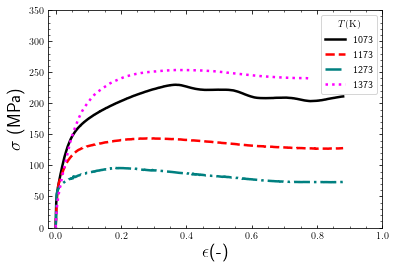

In [53]:
fig, ax = PyPlot.subplots()
ax.tick_params(which='both',direction="in",top=True,right=True)
ax.minorticks_on()

#for count,i in enumerate(data_dict.keys()):
for datas,line,colors,labels in zip(new_data_dict.values(),linestyle_list,set_colors,label_list):
    PyPlot.plot(datas['True Strain'],
                datas['True Stress'],
                color=colors,
                linewidth = 2.5,
                linestyle = line,
                label = labels
                )
    PyPlot.xlim(-0.025,max_strain_lim)
    PyPlot.ylim(0.0,max_stress_lim)
    PyPlot.xlabel('$\epsilon$(-)',fontsize=18)   # latex based symbols
    PyPlot.ylabel('$\sigma$ (MPa)',fontsize=18)
    PyPlot.legend(title='$ T (\mathrm{K})$')#,title_fontsize ='large')
        
fig.savefig('multi_stress_strain_cut_off.png',dpi=600)